## Customers dataset

This file uses pandas, numpy and matplotlib for data processing and visualization.
This is a dummy dataset for non existing company, generated with Mockaroo and split into 3 excel files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

Use os.listdir() to obtain every filename in current directory. Then iterate through it to see if it is "xlsx" file. If yes, then add it to frame_list. Then create DataFrame from frame_list and delete variable.

In [2]:
my_dir = os.listdir()
frame_list = []

for file in my_dir:
    if 'xlsx' in file:
        
        df = pd.read_excel(file, sheet_name = 'Sheet1')
        frame_list.append(df)
        
frame = pd.concat(frame_list, axis = 0, ignore_index = True)
del frame_list    

In [3]:
# Set index to start from 1 instead of 0
frame.index = frame.index + 1

In [4]:
frame.head(5)

,first_name,last_name,email_address,gender,birth_date,country,order_date,city,cc_number,purchase_amount
1,Berk,Guirard,berk.guirard@hotmail.com,M,15/07/2001,Iceland,10/01/2020,Reykjanesbær,5002353312956543,1902.84
2,Adrienne,Burner,adrienne.burner@hotmail.com,F,09/04/1989,Iceland,28/08/2020,Reykjanesbær,4903291885270160,552.09
3,Saunders,O'Halligan,saunders.o'halligan@gmail.com,M,12/06/1966,Iceland,11/01/2020,Reykjanesbær,4063696196215,2498.82
4,Christoffer,Wixey,christoffer.wixey@hotmail.com,M,16/06/1983,Iceland,26/06/2020,Reykjanesbær,5372117561668378,429.90
5,Corey,Cumming,corey.cumming@yahoo.com,M,18/12/1971,Iceland,29/02/2020,Reykjanesbær,491113297660013824,713.31


Display basic info about the DataFrame (num of columns, rows, data types)
Also aquire basic statistic values.

In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   first_name       1000 non-null   object 
 1   last_name        1000 non-null   object 
 2   email_address    1000 non-null   object 
 3   gender           1000 non-null   object 
 4   birth_date       1000 non-null   object 
 5   country          1000 non-null   object 
 6   order_date       1000 non-null   object 
 7   city             1000 non-null   object 
 8   cc_number        1000 non-null   int64  
 9   purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


In [6]:
frame['purchase_amount'].describe()

count    1000.000000
mean     1593.802500
std       848.122417
min        21.530000
25%       912.722500
50%      1646.720000
75%      2301.790000
max      2997.480000
Name: purchase_amount, dtype: float64

# Find some useful information inside the DataFrame.
1. Clients distribution across the countries
2. 5 most popular cities
3. Average sales per gender
4. Purchase per each country
5. Most popular email domains

In [7]:
# 1
frame['country'].value_counts()

United Kingdom    580
Ireland           357
Iceland            63
Name: country, dtype: int64

In [8]:
# 2
frame['city'].value_counts().head(5)

London       350
Dublin       110
Belfast       83
Liverpool     73
Glasgow       67
Name: city, dtype: int64

In [9]:
# 3
frame.groupby('gender').mean()['purchase_amount']

gender
F    1541.314009
M    1633.237811
Name: purchase_amount, dtype: float64

In [10]:
# 4
frame.groupby('country').sum()['purchase_amount']

country
Iceland            79014.15
Ireland           588158.65
United Kingdom    926629.70
Name: purchase_amount, dtype: float64

In [11]:
# 5
frame['email_address'].apply(lambda x: x.split('@')[1]).value_counts()

hotmail.com    369
yahoo.com      318
gmail.com      313
Name: email_address, dtype: int64

Format "order_date" and "birth_date" columns into datetime format.
Add 'quarter' and 'month' column to obtain data for plots.

In [12]:
# Format order_date column
frame['order_date'] = pd.to_datetime(frame['order_date'], format='%d/%m/%Y')
frame['birth_date'] = pd.to_datetime(frame['birth_date'], format='%d/%m/%Y')

In [13]:
# Add column for month and for 
frame['quarter'] = frame['order_date'].apply(lambda x: x.quarter)
frame['month'] = frame['order_date'].apply(lambda x: x.month)

In [14]:
frame.head(10)

,first_name,last_name,email_address,gender,birth_date,country,order_date,city,cc_number,purchase_amount,quarter,month
1,Berk,Guirard,berk.guirard@hotmail.com,M,2001-07-15,Iceland,2020-01-10,Reykjanesbær,5002353312956543,1902.84,1,1
2,Adrienne,Burner,adrienne.burner@hotmail.com,F,1989-04-09,Iceland,2020-08-28,Reykjanesbær,4903291885270160,552.09,3,8
3,Saunders,O'Halligan,saunders.o'halligan@gmail.com,M,1966-06-12,Iceland,2020-01-11,Reykjanesbær,4063696196215,2498.82,1,1
4,Christoffer,Wixey,christoffer.wixey@hotmail.com,M,1983-06-16,Iceland,2020-06-26,Reykjanesbær,5372117561668378,429.90,2,6
5,Corey,Cumming,corey.cumming@yahoo.com,M,1971-12-18,Iceland,2020-02-29,Reykjanesbær,491113297660013824,713.31,1,2
6,Johny,Rowat,johny.rowat@yahoo.com,M,1983-02-10,Iceland,2020-12-12,Reykjanesbær,5641827949809420,713.31,4,12
7,Barbie,Keasy,barbie.keasy@hotmail.com,F,2001-02-19,Iceland,2020-06-15,Reykjanesbær,4041373957836,1885.39,2,6
8,Artie,Derks,artie.derks@gmail.com,F,1976-05-27,Iceland,2020-11-19,Reykjanesbær,5100130768445473,1281.19,4,11
9,Mariejeanne,Clempton,mariejeanne.clempton@hotmail.com,F,2001-12-13,Iceland,2020-06-24,Reykjanesbær,4017958890860929,130.94,2,6
10,Dusty,Kemmons,dusty.kemmons@yahoo.com,M,1969-12-16,Iceland,2020-02-06,Reykjanesbær,4911083107008316,1113.02,1,2


# Create 4 plots:
1. Pie chart with customers distribution across the countries
2. Line chart with total sum of sales in each month
3. Bar chart with total sales in each quarter grouped by gender
4. Bar chart with average sales in each quarter grouped by country

1. Pie chart with customers distribution across the countries.

In [15]:
# Assign values to 'countries' variable and change them to percentages
countries = []

for num in frame['country'].value_counts():
    countries.append( round((num/1000) * 100, 1)  )

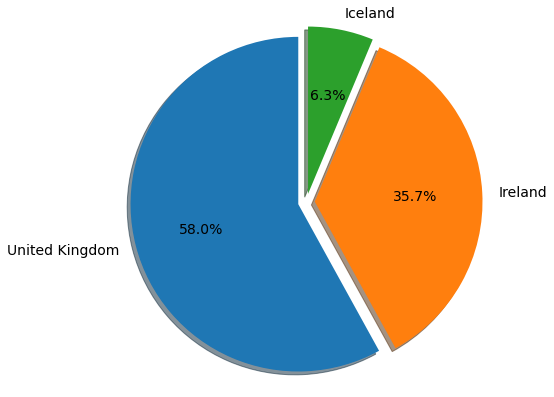

In [16]:
# Use matplotlib.pyplot to create a pie chart. 
labels = 'United Kingdom', 'Ireland', 'Iceland'
sizes = countries
explode = (0.05, 0.05, 0.05)

plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize = (7,7))
ax.pie(sizes, explode = explode, labels = labels, shadow = True, startangle = 90, autopct ='%1.1f%%')
ax.axis('equal')

plt.show()

2. Line chart with total sum of sales in each month.

In [17]:
# Extract months as an array.
# Use loop to iterate and append values for each month into list.

months = frame['month'].unique()
months.sort()

month_amount = frame.groupby(['month']).sum()['purchase_amount']
months_sum = []

for amount in month_amount:
    months_sum.append(round(amount, 2))
    
# Print to check if values are assigned correctly.
for pair in zip(months, months_sum):
    print(pair)

(1, 164950.25)
(2, 125972.94)
(3, 123113.08)
(4, 119717.25)
(5, 134932.67)
(6, 119358.7)
(7, 166456.95)
(8, 126528.83)
(9, 118972.41)
(10, 121089.7)
(11, 134941.11)
(12, 137768.61)


In [18]:
# Create a function to add lables for plot
def addlabels_plot(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

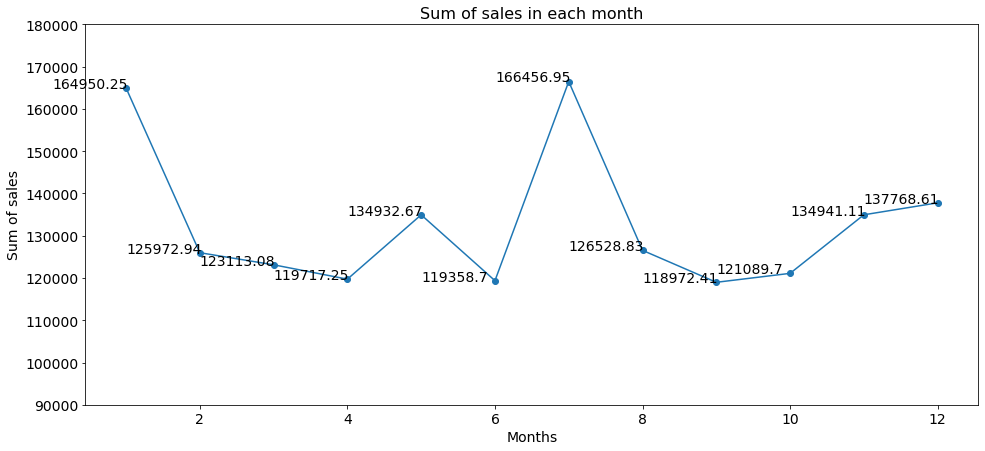

In [19]:
# Use matplotlib.pyplot together with previously defined function to create a line plot
width = 0.4
months.sort()

plt.figure(figsize = (16, 7))
plt.rcParams['font.size'] = 14

plt.plot(months, months_sum, marker = 'o')
plt.xlabel('Months')
plt.ylabel('Sum of sales')

addlabels_plot(months, months_sum)

plt.ylim(90000, 180000)
plt.title('Sum of sales in each month', fontsize = 16)

plt.show()

3. Bar chart with total sales in each quarter grouped by gender

In [20]:
# Assign grouped data into 'plt_frame'. Iterate through it to create 2 lists for women and men.

plt_frame = frame.groupby(['quarter', 'gender']).sum()['purchase_amount']
women_sum = []
men_sum = []

for i in range(1,5):
    women_sum.append(round(plt_frame[i]['F'],0))
    men_sum.append(round(plt_frame[i]['M'],0))

plt_frame

quarter  gender
1        F         161014.11
         M         253022.16
2        F         154736.90
         M         219271.72
3        F         169426.82
         M         242531.37
4        F         176045.88
         M         217753.54
Name: purchase_amount, dtype: float64

In [21]:
# Create functions to add lables for plot

def addlabels_men(x, y):
    for i in range(len(x)):
        plt.text(i + 0.8, y[i], y[i], ha = 'center')

def addlabels_women(x, y):
    for i in range(len(x)):
        plt.text(i + 1.2, y[i], y[i], ha = 'center')

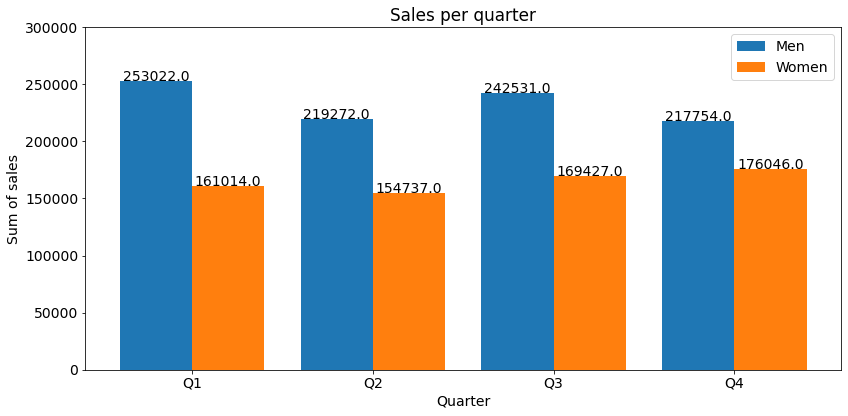

In [22]:
# Use matplotlib.pyplot together with previously defined functions to create bar plot for comparasion betweem genders
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
x = np.arange(1,5)
width = 0.4

plt.rcParams['font.size'] = 14
plt.figure(figsize = (12,6))

# Plot bars on a figure.
plt.bar(x-0.2, men_sum, width, label = 'Men')
plt.bar(x + 0.2, women_sum, width, label = 'Women')

# Use previously defined functions to add labels.
addlabels_men(quarters,men_sum)
addlabels_women(quarters, women_sum)

plt.ylabel('Sum of sales')
plt.ylim(0, 300000)

plt.xlabel('Quarter')
plt.xticks(x, quarters)

plt.title('Sales per quarter')
plt.legend()
plt.tight_layout()

4. Bar chart with average sales in each quarter grouped by country.

In [23]:
# Assign grouped data into 'quart'.
quart = frame.groupby(['quarter', 'country']).mean()['purchase_amount']
quart

quarter  country       
1        Iceland           1425.588889
         Ireland           1710.759639
         United Kingdom    1642.550800
2        Iceland            986.375000
         Ireland           1628.951170
         United Kingdom    1580.848889
3        Iceland           1322.523750
         Ireland           1628.828925
         United Kingdom    1622.707208
4        Iceland           1404.874000
         Ireland           1627.162069
         United Kingdom    1541.088067
Name: purchase_amount, dtype: float64

In [24]:
# Iterate through quart to obtain data for each country and append it to corresponding list.
iceland_sum = []
ireland_sum = []
uk_sum = []

for i in range(1, 5):
    iceland_sum.append(round(quart[i]['Iceland'],2))
    ireland_sum.append(round(quart[i]['Ireland'],2))
    uk_sum.append(round(quart[i]['United Kingdom'],2))

# Print to check if values are assigned correctly.
for index, num in enumerate(zip(iceland_sum, ireland_sum, uk_sum)):
    print(f' {index + 1}. {num} ')


 1. (1425.59, 1710.76, 1642.55) 
 2. (986.37, 1628.95, 1580.85) 
 3. (1322.52, 1628.83, 1622.71) 
 4. (1404.87, 1627.16, 1541.09) 


In [25]:
# Create functions to add lables for plot
def addlabels_uk(x, y):
    for i in range(len(x)):
        plt.text(i + 0.7, y[i], y[i], ha = 'center')

def addlabels_ireland(x, y):
    for i in range(len(x)):
        plt.text(i + 1, y[i], y[i], ha = 'center')
        
def addlabels_iceland(x, y):
    for i in range(len(x)):
        plt.text(i + 1.3, y[i], y[i], ha = 'center')

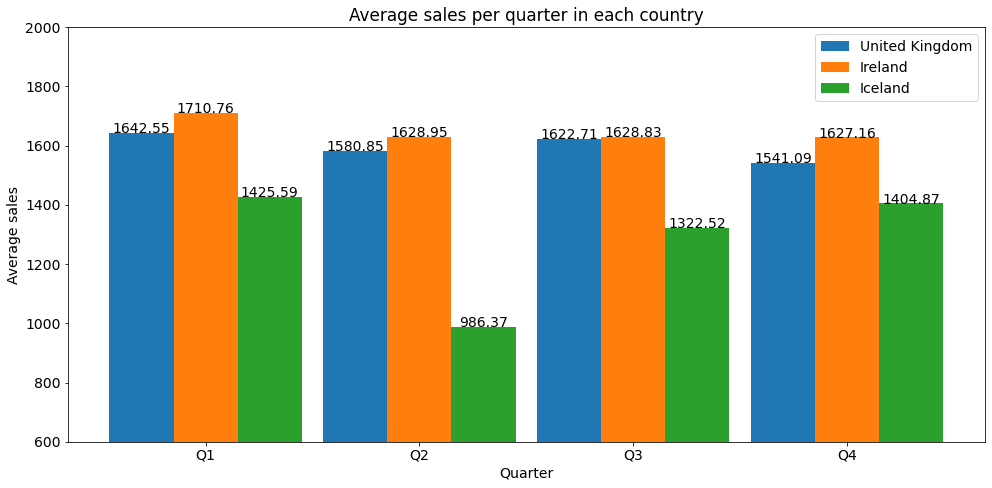

In [26]:
# Use matplotlib.pyplot together with previously defined functions to create bar plot for comparasion betweem countries.
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
x = np.arange(1, 5)
width = 0.3

plt.rcParams['font.size'] = 14
plt.figure(figsize = (14,7))

# Plot bards foe each country on a figure
plt.bar(x-width, uk_sum, width, label = 'United Kingdom')
plt.bar(x, ireland_sum, width, label = 'Ireland')
plt.bar(x+width, iceland_sum, width, label = 'Iceland' )

# Use previously defined functions to add labels for each bar.
addlabels_uk(quarters, uk_sum)
addlabels_ireland(quarters, ireland_sum)
addlabels_iceland(quarters, iceland_sum)

plt.ylabel('Average sales')
plt.ylim(600, 2000)

plt.xlabel('Quarter')
plt.xticks(x, quarters)

plt.title('Average sales per quarter in each country')
plt.legend()
plt.tight_layout()